https://www.doogal.co.uk/UkStations.php

In [99]:
from pathlib import Path

import swifter
import fiona
import geopandas as gpd
import matplotlib.pyplot as pltd

from convertbng.util import convert_bng

plt.style.use("seaborn-poster")
plt.style.use("seaborn-colorblind")

plt.rcParams['figure.dpi'] = 50

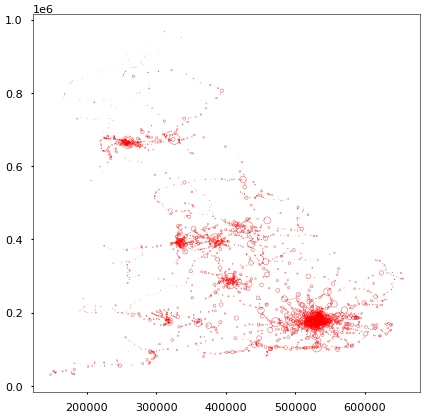

In [100]:
df_stations = pd.read_csv("Data/GB stations.csv")

df_stations["Eastings"], df_stations["Northings"] = convert_bng(df_stations.Longitude, df_stations.Latitude)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_stations["Eastings"], df_stations["Northings"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="Red")

In [93]:
df_stations

Station  Postcode   Latitude  Longitude  TLC   NLC  \
0         Abbey Wood   SE2 9RH  51.491061   0.121394  ABW  5131   
1               Aber  CF83 1AQ  51.574969  -3.229829  ABE  3813   
2          Abercynon  CF45 4SE  51.644712  -3.326989  ACY  3801   
3           Aberdare  CF44 0PU  51.715062  -3.443084  ABA  3982   
4           Aberdeen  AB11 6LX  57.143706  -2.098685  ABD  8976   
...              ...       ...        ...        ...  ...   ...   
2564           Yoker   G81 1AD  55.892592  -4.386288  YOK  9990   
2565            York  YO24 1AB  53.957966  -1.093182  YRK  8263   
2566          Yorton   SY4 3EP  52.808960  -2.736462  YRT  1351   
2567   Ystrad Mynach  CF82 7BP  51.640938  -3.241296  YSM  4026   
2568  Ystrad Rhondda  CF41 7SR  51.643644  -3.466685  YSR  3871   

                             Owner  Entries and exits 2020  \
0                         TfL Rail                 3825206   
1                         TfW Rail                  228480   
2                         TfW Rail                  282886   
3                         TfW Rail                  504622   
4                         ScotRail                 2497108   
...                            ...                     ...   
2564                      ScotRail                  175180   
2565  London North Eastern Railway                10089306   
2566                      TfW Rail                    7544   
2567                      TfW Rail                  327198   
2568                      TfW Rail                   45044   

      Entries and exits 2019  Entries and exits 2018  ...  Interchanges 2012  \
0                  3769402.0               3124856.0  ...                0.0   
1                   245218.0                251108.0  ...                0.0   
2                   289008.0                298358.0  ...            35304.0   
3                   555780.0                571746.0  ...                0.0   
4                  2616142.0               2948186.0  ...           197046.0   
...                      ...                     ...  ...                ...   
2564                173104.0                164182.0  ...                0.0   
2565               9990538.0               9833864.0  ...          1197458.0   
2566                  7088.0                  7686.0  ...                0.0   
2567                374484.0                376976.0  ...                0.0   
2568                 48906.0                 52532.0  ...                0.0   

      Interchanges 2011  Interchanges 2010  Interchanges 2009  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2               33225.0            29324.0            28775.0   
3                   0.0                0.0                0.0   
4              148594.0           164299.0           162526.0   
...                 ...                ...                ...   
2564                0.0                0.0                0.0   
2565           730555.0           756667.0           797940.0   
2566                0.0                0.0                0.0   
2567                0.0                0.0                0.0   
2568                0.0                0.0                0.0   

      Interchanges 2008  Interchanges 2007  Interchanges 2006  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   NaN                NaN                NaN   
3                   0.0                0.0                0.0   
4              119259.0           230788.0           201417.0   
...                 ...                ...                ...   
2564                0.0                0.0                0.0   
2565           757246.0           917777.0           796643.0   
2566                0.0                0.0                0.0   
2567                0.0                0.0                0.0   
2568  

In [102]:
gdf = gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations.Longitude, df_stations.Latitude))
print(gdf.crs)

None


In [95]:
fiona.listlayers("Data/bdline_gpkg_gb/data/bdline_gb.gpkg")

['boundary_line_ceremonial_counties',
 'boundary_line_historic_counties',
 'community_ward',
 'county_electoral_division',
 'county',
 'district_borough_unitary',
 'district_borough_unitary_ward',
 'european_region',
 'greater_london_const',
 'high_water',
 'parish',
 'polling_districts_england',
 'scotland_and_wales_const',
 'scotland_and_wales_region',
 'unitary_electoral_division',
 'westminster_const']

(-1.0, 1.0)

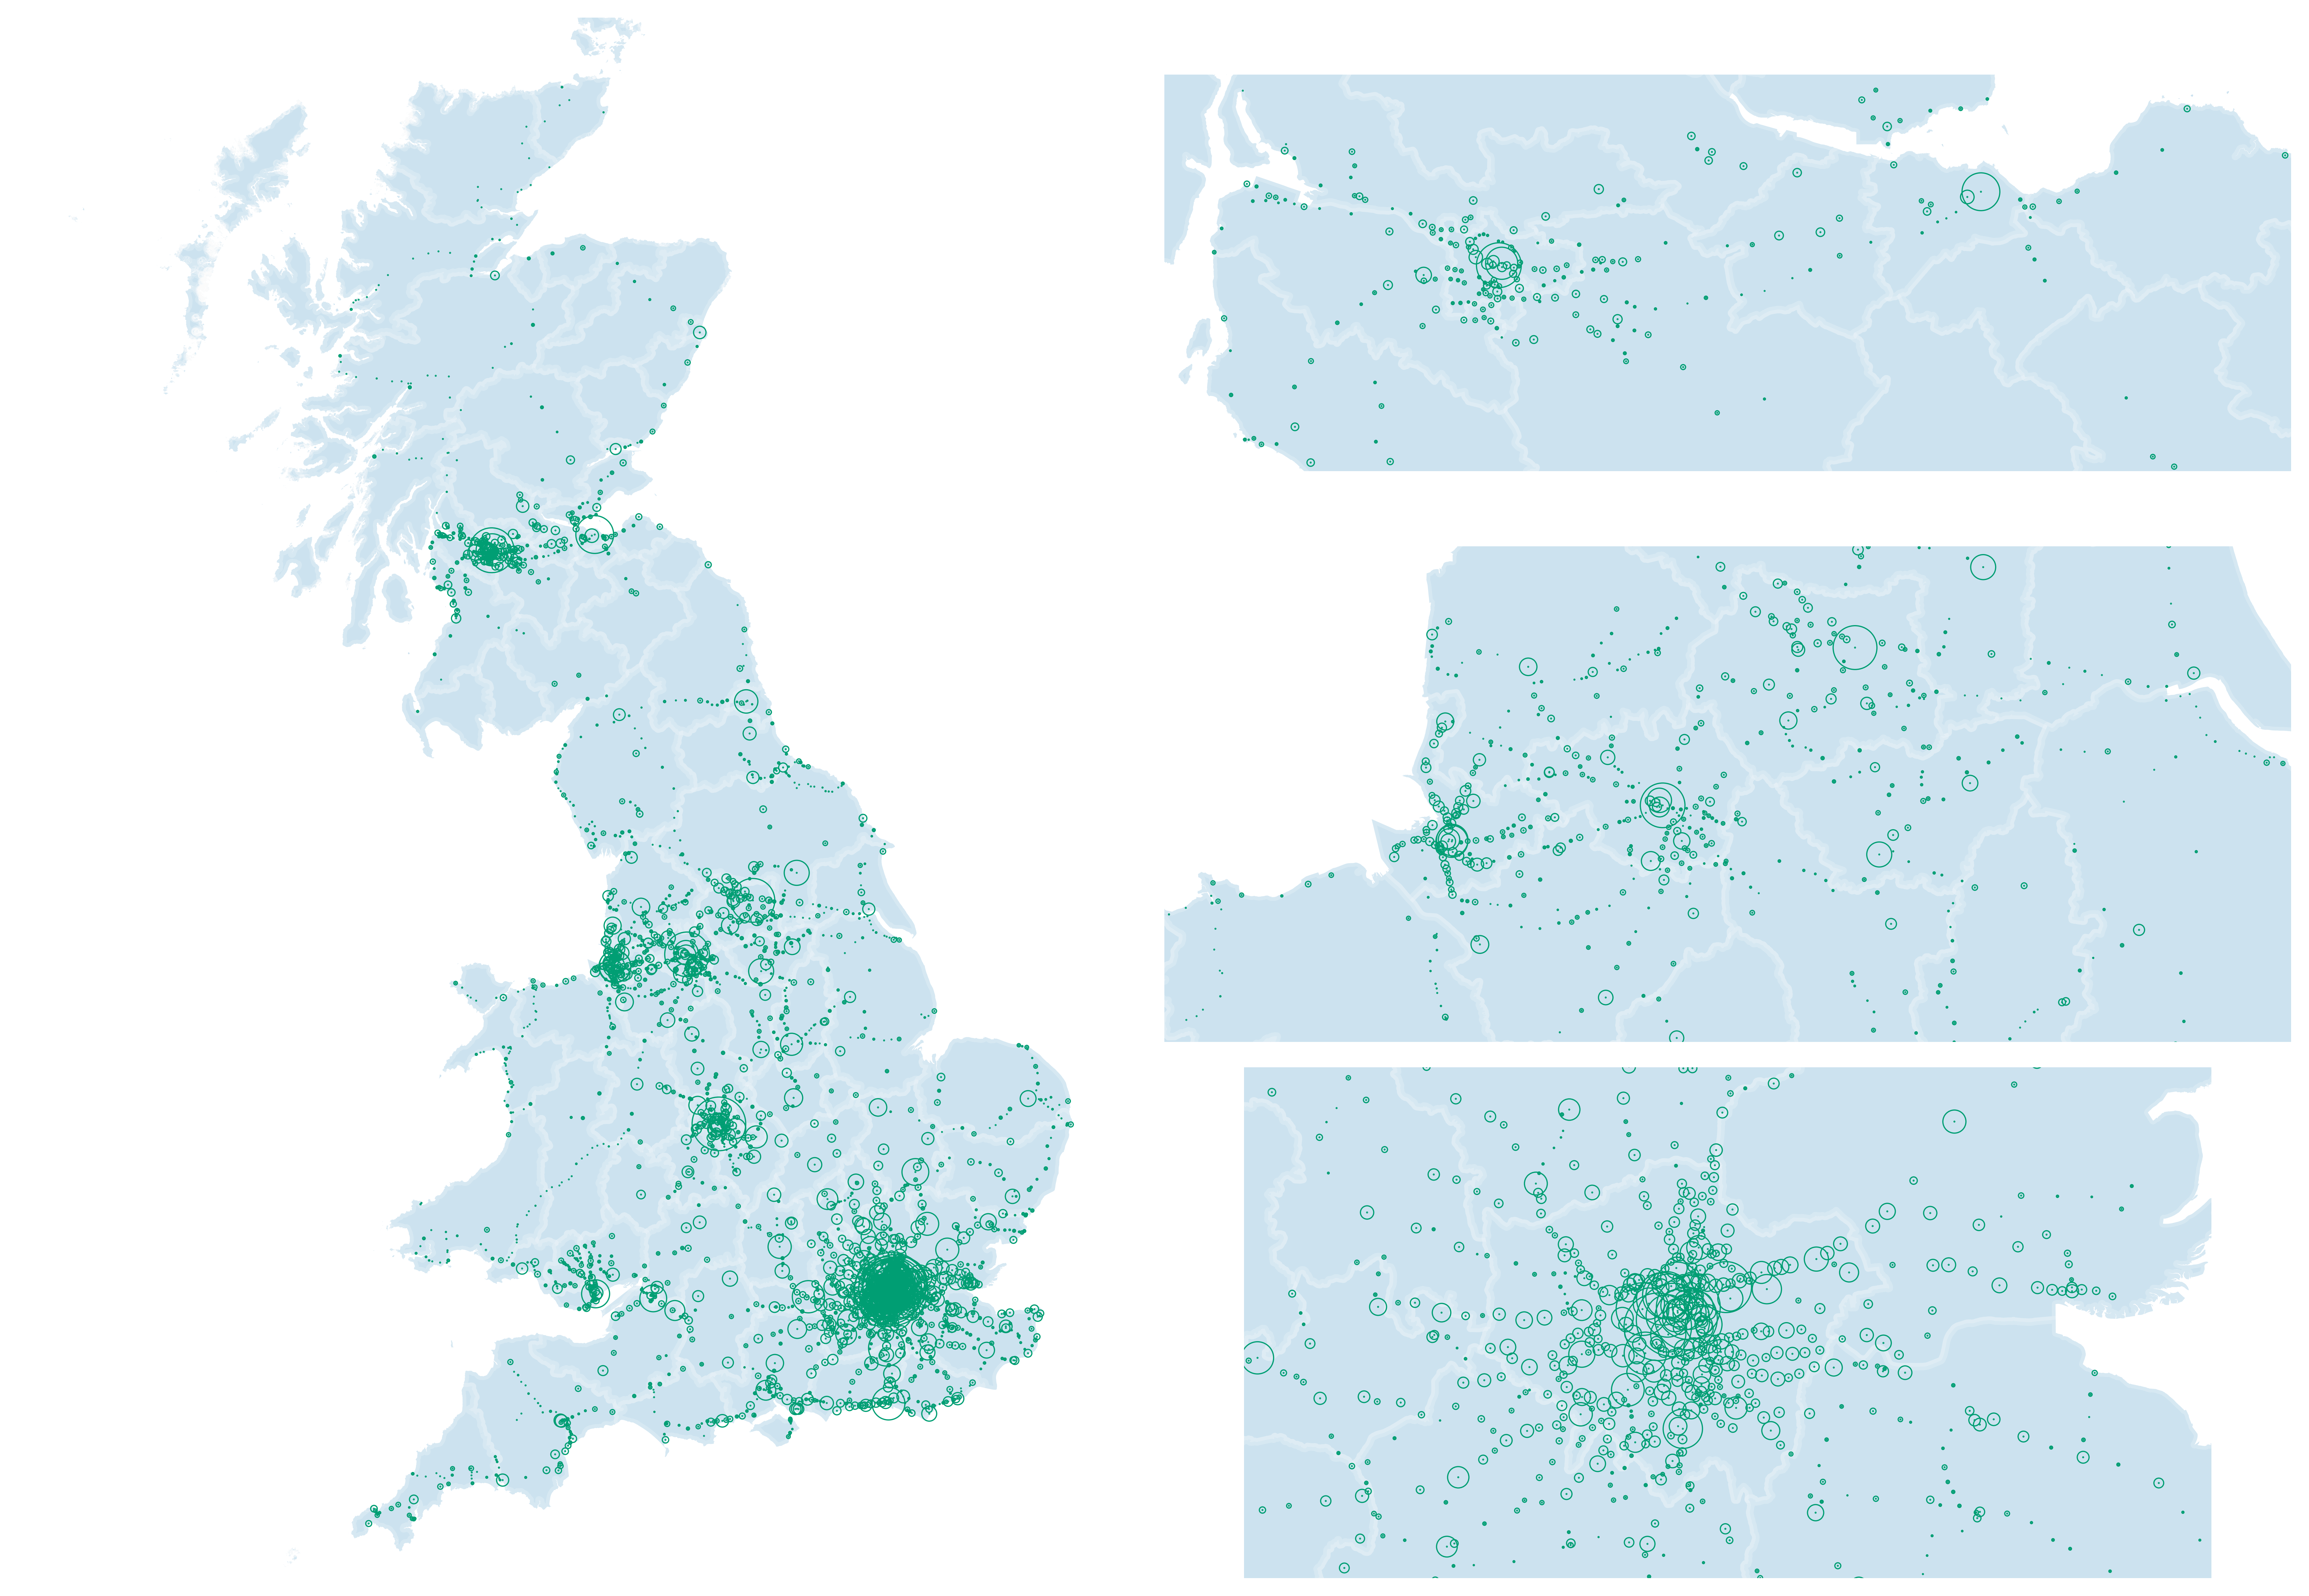

In [96]:
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3,2)


axl = fig.add_subplot(gs[:, 0], frameon=False)
axl.set_axis_off()

axtr = fig.add_subplot(gs[0, 1], frameon=False)
axtr.set_axis_off()
axmr = fig.add_subplot(gs[1, 1], frameon=False)
axmr.set_axis_off()
axbr = fig.add_subplot(gs[2, 1], frameon=False)
axbr.set_axis_off()


uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg")
uk = uk.to_crs(epsg=4326)

axl = uk.plot(ax=axl,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)
axl.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="C1")
axl.scatter(df_stations["Longitude"], df_stations["Latitude"], c="None", edgecolors="C1", s=0.1)
axl.set_ylim((49.8, 59))


axtr = uk.plot(ax=axtr,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)
axtr.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="C1")
axtr.scatter(df_stations["Longitude"], df_stations["Latitude"], c="None", edgecolors="C1", s=0.1)
axtr.set_ylim((55.6, 56.1))
axtr.set_xlim((-5, -2.5))


axmr = uk.plot(ax=axmr,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)
axmr.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="C1")
axmr.scatter(df_stations["Longitude"], df_stations["Latitude"], c="None", edgecolors="C1", s=0.1)
axmr.set_ylim((53, 54))
axmr.set_xlim((-4, 0))


axbr = uk.plot(ax=axbr,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)
axbr.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/100000, c="None", edgecolors="C1")
axbr.scatter(df_stations["Longitude"], df_stations["Latitude"], c="None", edgecolors="C1", s=0.1)
axbr.set_ylim((51.2, 51.8))
axbr.set_xlim((-1, 1))
